In [1]:
# import library
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
# get data london_crime_by_lsoa.csv
crimes = pd.read_csv('london_crime_by_lsoa.csv')
print(type(crimes))

<class 'pandas.core.frame.DataFrame'>


In [3]:
crimes.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
crimes3 = crimes.iloc[:,1:]
crimes3.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


# Visualizing the Data

### 2. Histogram

In [5]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

#### Question 2: How do the sum of crimes vary by borough ?

In [6]:
borough_count = pd.DataFrame(crimes3.groupby('borough').size().sort_values(ascending=False).rename('counts').reset_index())
borough_count.head()

,borough,counts
0,Croydon,602100
1,Barnet,572832
2,Ealing,549396
3,Bromley,523908
4,Lambeth,519048


In [14]:
 #???


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


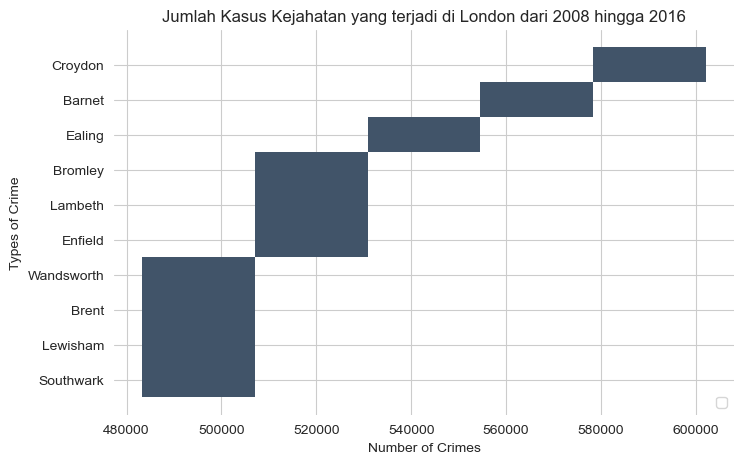

In [13]:
# Define the matplotlib figure size
f, ax = plt.subplots(figsize=(8, 5))
sns.set_style("whitegrid")

# Plot the total crashes
sns.set_color_codes("pastel")
sns.histplot(x="counts",
            y="borough",
            data=borough_count.iloc[:10, :],
            label="Total",
            color="b")

# Buat nampilin barplot/label/keterangan 'Total'. Posisi di kanan bawah
ax.legend(ncol=2, loc="lower right", frameon=True)

#
ax.set(title="Jumlah Kasus Kejahatan yang terjadi di London dari 2008 hingga 2016",
       ylabel="Types of Crime",
       xlabel="Number of Crimes")
sns.despine(left=True, bottom=True)

# Add a legend and informative axis label
plt.show()

### 3. Bar Chart

In [9]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

#### Question 3: Which number of major category of crime are most in London ?

Using artist layer and the crimes3 dataset, create a vertical bar plot showing the total number of crimes in London from major_category, for the period 2008-2016. Label each types of crime with the total.

    Step 1: Dapatkan dataset yang berkaitan dengan banyak kasus kejahatan yang terjadi di London. Buat dataframe crimes_count untuk mengurutkan jenis kejahatan tertinggi berdasarkan laporan terbanyak dari tahun 2008 hingga 2016.

In [10]:
# create crime_count dataframe by grouping major category column
# column of crimes3 dataframe
crime_count = pd.DataFrame(crimes3.groupby('major_category').size().sort_values(ascending=False).rename('counts').reset_index())
crime_count

,major_category,counts
0,Theft and Handling,3966300
1,Violence Against the Person,3171744
2,Criminal Damage,2069172
3,Drugs,1179468
4,Burglary,1043604
5,Robbery,939384
6,Other Notifiable Offences,776304
7,Fraud or Forgery,236520
8,Sexual Offences,108108


Penjelasan :
- CL_top5 (Top 5 Crimes in London)
- size diatas
- reset_index diatas untuk nambahin index tiap baris
- rename diatas untuk nambahin kolom 'counts'
- sort_values diatas untuk mengurutkan kolom 'counts'

    Step 2: Plot the Bar charts

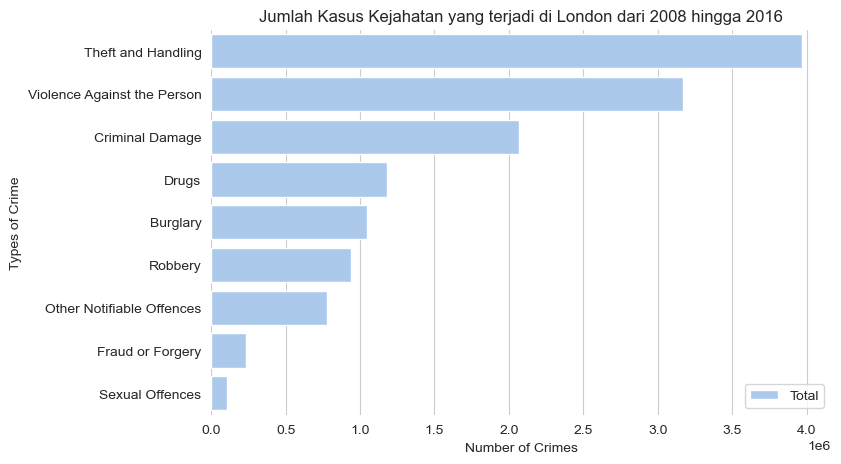

In [11]:
# Define the matplotlib figure size
f, ax = plt.subplots(figsize=(8, 5))
sns.set_style("whitegrid")

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="counts",
            y="major_category",
            data=crime_count.iloc[:10, :],
            label="Total",
            color="b")

# Buat nampilin barplot/label/keterangan 'Total'. Posisi di kanan bawah
ax.legend(ncol=2, loc="lower right", frameon=True)

#
ax.set(title="Jumlah Kasus Kejahatan yang terjadi di London dari 2008 hingga 2016",
       ylabel="Types of Crime",
       xlabel="Number of Crimes")
sns.despine(left=True, bottom=True)

# Add a legend and informative axis label
plt.show()

Berdasarkan bar chart diatas, jumlah tertinggi kasus kejahatan di London adalah Theft and Handling, sedangkan posisi kedua diisi oleh Violence against the person.